# 一般化線形混合モデル (GLMM)

一般化線形混合モデル (GLMM) は，現実のデータ解 析で考慮しなければならない個体差・場所差の効果をうまく表現できる統計 モデルです.

## 架空データの例題を作りながら GLM

>今回の架空植物のデータは第 4 回の講義のロジスティック回帰の紹介 で導入した結実確率を推定できるようなものです. 1 ここではこの架空植 物の個体ごとの (種子数ではなく) 結実確率がどのように決まるか (統計モデ
ルでどう表現するのがよいのか) をあつかいたいとします.個体は i という はいしゅ
記号であらわされ(i = 1,2,3,··· ,100, つまり 100 個体います)，その胚珠2 数は 8 個 (全個体共通)，結実した 3 種子数は yi とします.胚珠数が Ni = 8 個なので全部結実した場合には種子数 yi = 8 個となり，これが最大種子数， 最小種子数はもちろん全胚珠が結実に失敗して種子数ゼロ個の場合です.つ まり，yi ∈ {0,1,2,3,··· ,8} ということです.

>またこの架空植物は 2 枚から 6 枚の葉っぱをもち，個体 i ごとに異なる 葉数 xi をもつとします.

>こ の例題で調べたいことは「ある個体の結実確率 qi は葉数 xi が大きいほど高 いという性質がある」というときに，どういう統計モデリング・推定の方法 でそれを解明できるか，というものです.


In [1]:
source("f.R")

In [2]:
head(d)

N,x,re,y
8,2,0,2
8,2,0,2
8,2,0,0
8,2,0,1
8,2,0,0
8,2,0,0


In [3]:
logistic

function (z) 
1/(1 + exp(-z))

In [4]:
d$y <- rbinom(100, 8, prob = logistic(-4 + 1 * d$x))

In [5]:
summary(d)

       N           x           re          y       
 Min.   :8   Min.   :2   Min.   :0   Min.   :0.00  
 1st Qu.:8   1st Qu.:3   1st Qu.:0   1st Qu.:1.00  
 Median :8   Median :4   Median :0   Median :4.00  
 Mean   :8   Mean   :4   Mean   :0   Mean   :3.83  
 3rd Qu.:8   3rd Qu.:5   3rd Qu.:0   3rd Qu.:6.00  
 Max.   :8   Max.   :6   Max.   :0   Max.   :8.00  

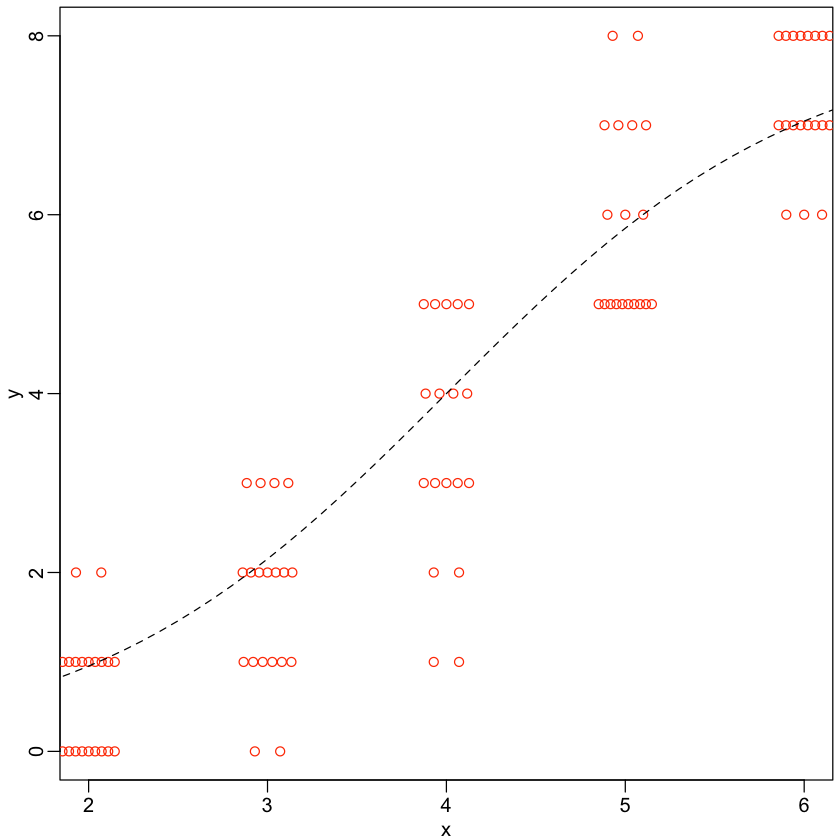

In [9]:
plot.d(d)
xx <- seq(1, 7, 0.1)
lines(xx, logistic(-4 + xx) * 8, lty = 2) # 破線

In [11]:
fitA <- glm(cbind(y, N-y)~x, data = d, family = binomial)
beta <- fitA$coefficients
beta

(Intercept)           x 
   -4.63708     1.12573

In [12]:
fitA


Call:  glm(formula = cbind(y, N - y) ~ x, family = binomial, data = d)

Coefficients:
(Intercept)            x  
     -4.637        1.126  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    433.6 
Residual Deviance: 104.6 	AIC: 285.6

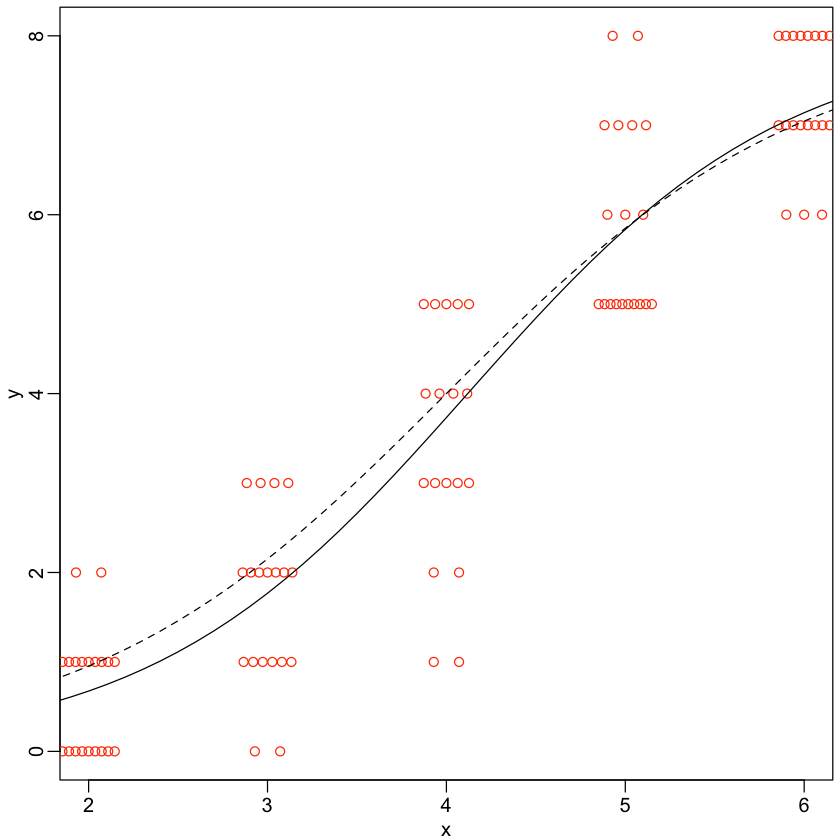

In [17]:
plot.d(d)
xx <- seq(1, 7, 0.1)
lines(xx, logistic(-4 + xx) * 8, lty = 2) # 破線
lines(xx, logistic(beta[1] + beta[2] * xx) * 8)             

## 種子結実データなのに GLM がうまくいかない状況がある?

個体差を仮定．$r_i$
\begin{align}
    q_i = \frac{1}{a + \exp(-(\beta_1+\beta_2x_i+r_i))}
\end{align}
$r_i$平均ゼロの正規分布に従うとする．

>重要なのは，観測者であるわれわれはこの架空植物のすべてを知ることは
どうやっても不可能であり，「個体差」は原因不明のままあつかわないといけ
ない，ということです

In [18]:
d$re <- rnorm(100, 0, 3) # 「個体差」の平均ゼロ, SD は 3
d$y <- rbinom(100, 8, prob = logistic(-4 + d$x + d$re))

In [19]:
d$id <- 1:nrow(d) # ついでに個体番号 i も追加
summary(d)

       N           x           re                y              id        
 Min.   :8   Min.   :2   Min.   :-8.6853   Min.   :0.00   Min.   :  1.00  
 1st Qu.:8   1st Qu.:3   1st Qu.:-2.7970   1st Qu.:1.00   1st Qu.: 25.75  
 Median :8   Median :4   Median :-0.8460   Median :2.00   Median : 50.50  
 Mean   :8   Mean   :4   Mean   :-0.9967   Mean   :3.22   Mean   : 50.50  
 3rd Qu.:8   3rd Qu.:5   3rd Qu.: 1.1702   3rd Qu.:6.25   3rd Qu.: 75.25  
 Max.   :8   Max.   :6   Max.   : 5.9707   Max.   :8.00   Max.   :100.00  

In [20]:
fitB <- glm(cbind(y, N - y) ~ x, data = d, family = binomial)
(beta <- fitB$coefficients)

(Intercept)           x 
 -2.6097806   0.5397811

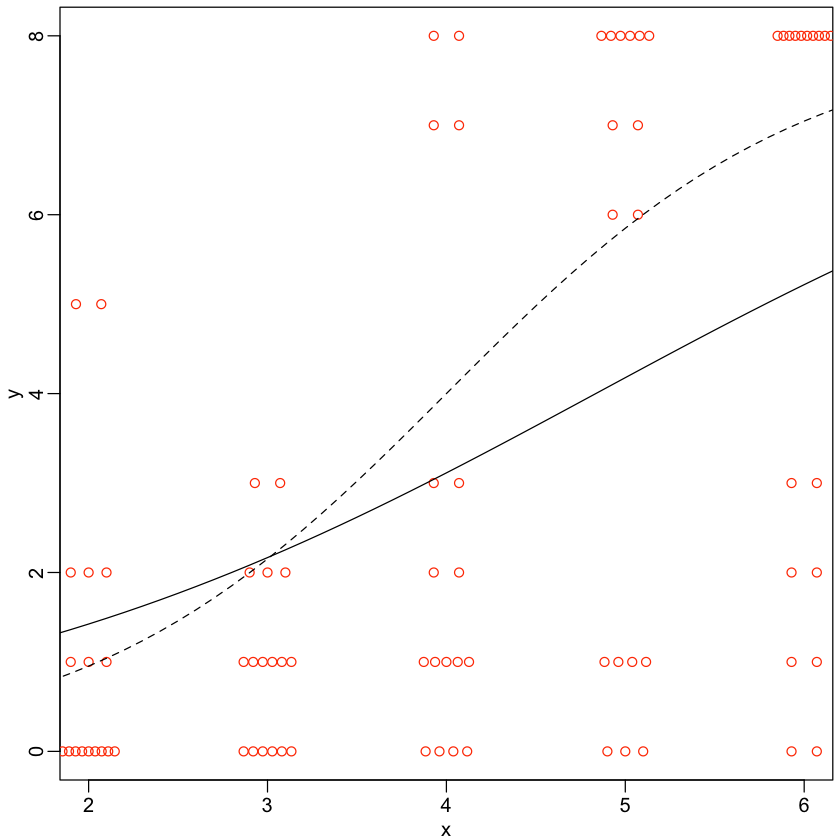

In [21]:
plot.d(d)
xx <- seq(1, 7, 0.1)
lines(xx, logistic(-4 + xx) * 8, lty = 2) # 破線
lines(xx, logistic(beta[1] + beta[2] * xx) * 8) # 実線が予測

>今回はうまくいってないようですね.観測データを作った統計モデルでは β1 =−4でβ2 =1だったのに，推定値はβˆ1 =−2.15でβˆ2 =0.51となって います.そしてこれは「たまたま」こうなったのではなく，何回やりなおし ても「傾きがゆるい」つまりβ2 が過小推定されるような結果になります.


## 「個体差」と過分散

個体差入れると分散が大きくなって二項分布では表現できない．__過分散__という．逆に分散が小さくなりすぎることを__underdispersion__という．

under dispersion がよく出てくる．この取り扱いを検討する．

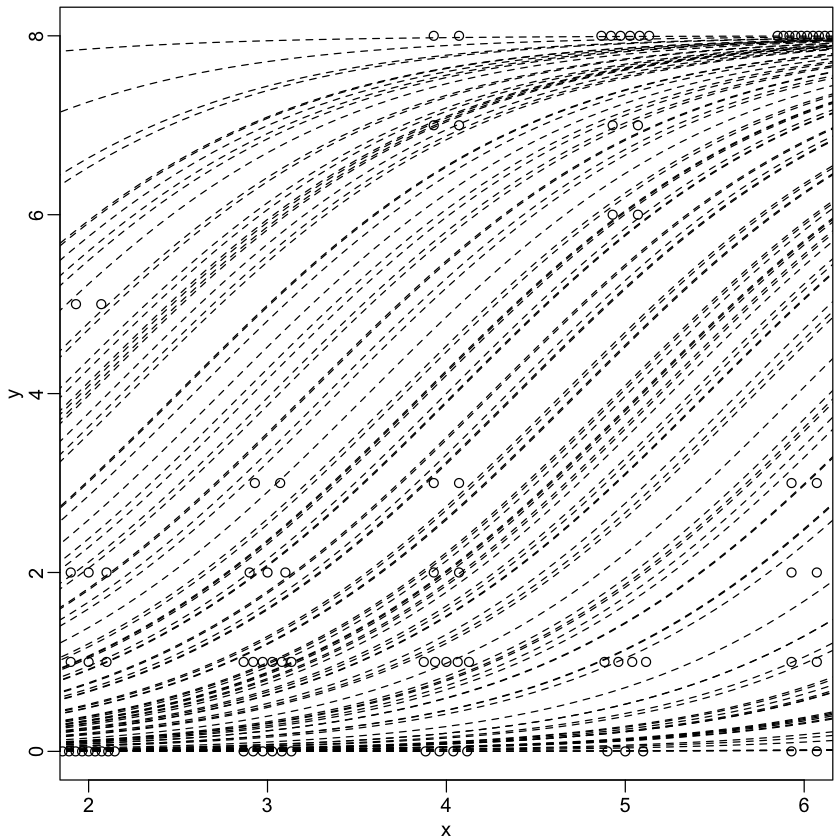

In [22]:
plot.d(d, col = "black")
for (re in d$re) lines(xx, logistic(-4 + xx + re) * 8, lty = 2)
lines(xx, logistic(-4 + xx) * 8, lty = 2)

In [23]:
d4 <- d[d$x == 4,]
head(d4)

,N,x,re,y,id
41,8,4,-1.691849,4,41
42,8,4,-2.803090,0,42
43,8,4,5.970697,8,43
44,8,4,-8.341410,0,44
45,8,4,3.056023,8,45
46,8,4,-1.250925,2,46


In [24]:
sum(d4$N)

[1] 160

In [25]:
sum(d4$y)

[1] 60

In [26]:
sum(d4$y) / sum(d4$N)

[1] 0.375

In [28]:
mean(d4$y)
var(d4$y)

[1] 3

[1] 8.105263

二項分布を仮定すると，分散が合わない

In [29]:
summary(as.factor(d4$y))

0 1 2 3 4 5 6 7 8 
4 5 2 2 1 1 1 2 2

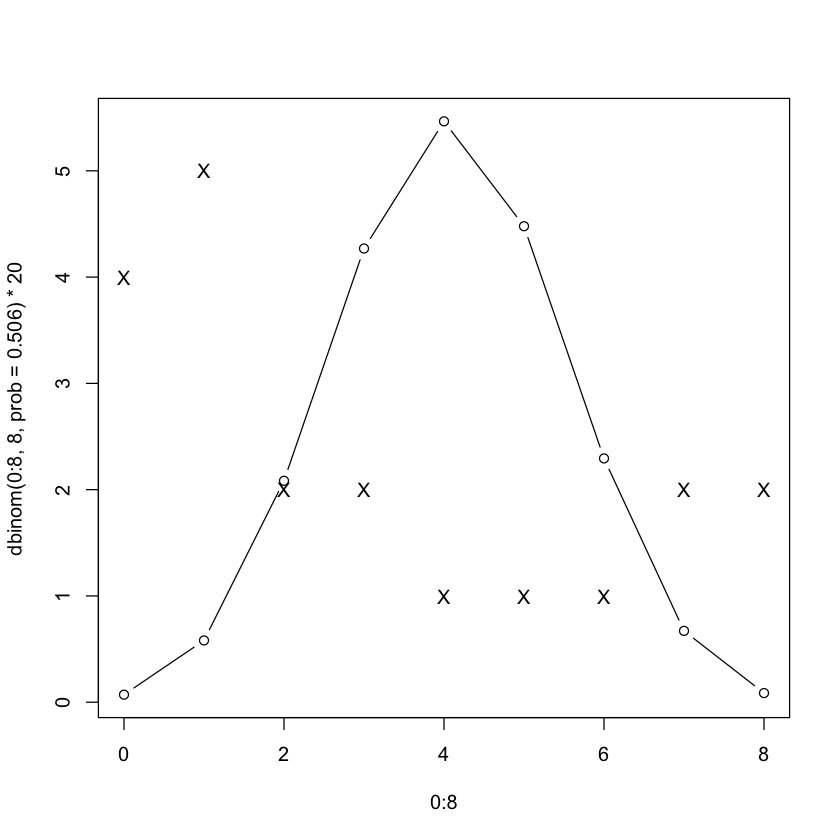

In [30]:
plot(0:8, dbinom(0:8, 8, prob = 0.506) * 20, type = "b")
points(0:8, summary(as.factor(d4$y)), pch = "X")

二項分布やポアソン分布のように「平均が決まると自動的に分散が決まる」 つまり 1 パラメーター確率分布を使っているときにだけ過分散の有無を言 えます.正規分布や負の二項分布といった平均とは独立に分散も自由に指定 できる確率分布を使った統計モデルを想定している場合には過分散について 議論できません.

## 一般化線形混合モデル (GLMM)

- 結実確率 qi の集団平均を上下しているモノは何でしょうか? パラメーター β1 と β2，そして葉数 xi です.これらの値の中でパラメーターでないもの， つまり葉数 xi は fixed effects (日本語では母数効果あるいは固定効果) と 呼ばれています.また葉数 xi に対応するパラメーター (係数) β2 や「切片」 β1 は fixed effects の影響の大きさをあらわすパラメーターと分類されます. これらのパラメーターは全個体に共通しています

- これに対して個体 i の「個体差」 19 を表現しているパラメーター ri の集 団平均はゼロと定義されているので，結実確率 qi の集団平均に無関係であ り， 20 ただ個体間の結実確率のばらつきにのみ影響を与えています.この ように個体ごとに異なる効果は random effects (変量効果またはランダム 効果) です.ri は random effects をあらわすパラメーターで，個体 i ごとに 異なります.

- GLM のロジスティックモデルに ri を追加して改良したモデルは fixed と random effects の両方を含んでいるので混合モデル (mixed model) と呼ば れ，「個体差」を明示的にあつかえる統計モデルになっています.

## Random effects 考慮した最尤推定


>しかしながら100個体ぶんの結実数データyi を説明するために{rˆ1,rˆ2,··· ,rˆ100} というふうに最尤推定か何かで 100 個のパラメーター ri の値を確定しちゃっ ていいものでしょうか? これって deviance の説明にでてきた FULL モデル みたいなもので，あてはまりはいいかもしれないけれど，たとえば AIC 的 には最悪 21 となりそうです.

そこで GLMM など混合モデルでは
- fixed effects をあらわすパラメーター β1 や β2 は最尤推定する
- random effects あらわすパラメーター {ri} たちは 最尤推定しない

確率分布
\begin{align}
    g(r_i \mid s) = \frac{1}{\sqrt{2\pi s^2}}\exp(-\frac{{r_i}^2}{2s^2})
\end{align}
sは標準偏差．
尤度は
\begin{align}
    L_i(\beta_1, \beta_2, s \mid x_i, y_i) = \int_{-\infty}^{\infty} f(y_i \mid \beta_1, \beta_2, r_i) g(r_i \mid s) dr_i
\end{align}

## R でやってみる GLMM 推定

In [31]:
 install.packages("glmmML")


The downloaded binary packages are in
	/var/folders/bn/1hqwt72n7yl9yyv0_9134pzh0000gn/T//Rtmp1DfRs5/downloaded_packages


In [32]:
library(glmmML)

In [34]:
 fitfitC <- glmmML(cbind(y, N - y) ~ x, data = d, family = binomial, cluster = id, method = "ghq")

In [35]:
fitC


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = d,      cluster = id, method = "ghq") 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.828   0.9454 -5.107 3.28e-07
x            1.037   0.2224  4.664 3.10e-06

Scale parameter in mixing distribution:  2.559 gaussian 
Std. Error:                              0.319 

        LR p-value for H_0: sigma = 0:  1.091e-57 

Residual deviance: 258.5 on 97 degrees of freedom 	AIC: 264.5 

- Call の下にある table は glm() 出力でいう Coefficients (係数) つま
りパラメーターの最尤推定値32 です: βˆ1 = −4.19 (ホントの β1 = −4)， 32. そしてその憶測標準
   βˆ2 = 1.01 (ホントの β1 = 1) とうまく推定できてるようです 33
- Standard deviation ... は「個体差 ri のばらつき」こと s の最尤
推定値，その下の Std. Error は s の推定値のばらつき (標準誤差) です: sˆ = 2.4 (ホントの s = 3)，と過小推定されています
- 100 個のデータにたいして {β1,β2,s} の 3 パラメーターを使ってい るので (使える) 残りの自由度は 100 - 3 = 97，そのときの residual deviance は 269.4 で AIC は 275.4 ということです

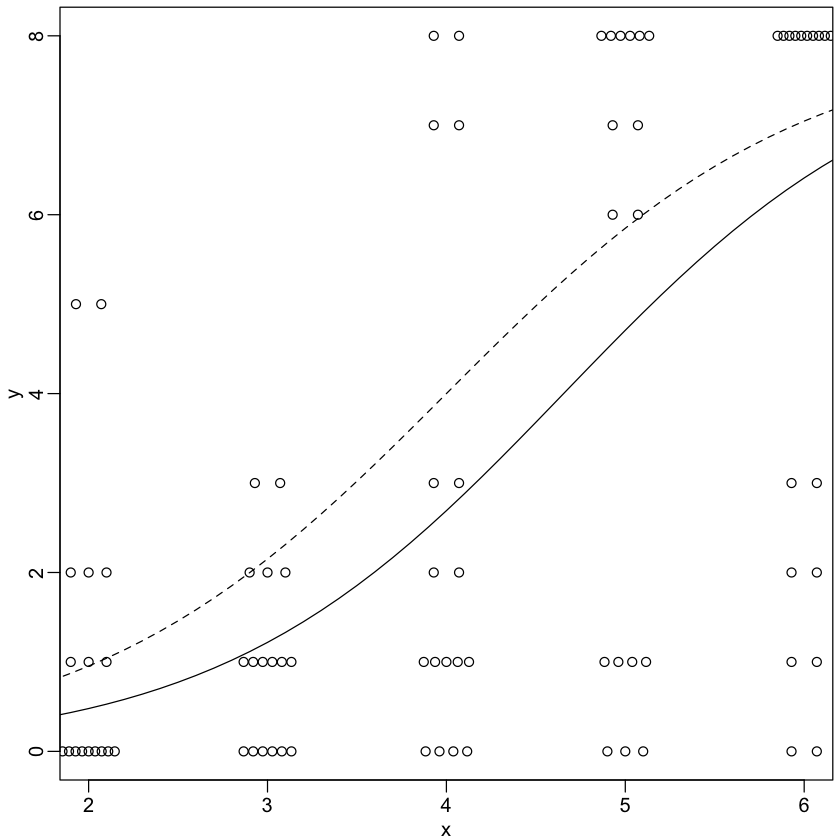

In [36]:
plot.d(d, col = "black")
lines(xx, logistic(-4 + xx) * 8, lty = 2) # 「真」の値
beta <- fitC$coefficients
lines(xx, logistic(beta[1] + beta[2] * xx) * 8) # 予測

## 混合モデルの使いどころ

>また観測データが正規分布の場合はどうなるでしょうか? データのばらつ きが正規分布で，見えざる「個体差」のばらつきも正規分布，平均は β1 + β2xA + β3xB + ... と「線形予測子そのまま」 37 であれば線形混合モデル (linear mixed model) 38 ということになり，これはじつは nested ANOVA だの repeated なんちゃらだのと呼ばれるあれこれの正体です

この講義ではあまり深いりしませんが，混合モデルの考えかたを発展させ ていくといろいろと興味ぶかい現象の統計モデリングに応用できます.たと えば
- 一個体から何度もサンプリングをくりかえす縦断的データ(longitudinal data) の解析，あるいは擬似反復 (pseudo replication) 問題への対策
- 実験ブロック差がある中での個体差といったネストされた (nested な) random effects のモデリング
- 距離が近いほど二個体は挙動がより似ている，といった空間相関の問題

など，生態学データ解析で「よくある状況」です.これらに対処できる統計 モデルを考えるときに，今回の講義でとりあつかった最も簡単な GLMM は その出発点となるものです.

## GLMM と階層ベイズモデル

GLMM は階層ベイズモデルの一種です.ただし，以下のよ うな特徴があります.
- fixed effects をあらわすパラメーター β1 や β2 は事前分布を明示的に 仮定しない，そしてこれらを最尤推定している
- random effects をあらわすパラメーター ri に関しては「平均ゼロで標 準偏差 s の正規分布」という事前分布を仮定している
- ri の事前分布をきめる超パラメーター (hyper parameter) である s も 事前分布は明示的に仮定せず，最尤推定値を計算している
